# 2012年後

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_237832row_cleaned.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237832 entries, 0 to 237831
Data columns (total 51 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         237832 non-null  object 
 1   土地位置建物門牌     237832 non-null  object 
 2   交易年月日        237832 non-null  object 
 3   建築完成年月       212559 non-null  float64
 4   建物移轉總面積平方公尺  237832 non-null  float64
 5   有無管理組織       237832 non-null  object 
 6   總價元          237832 non-null  int64  
 7   單價元平方公尺      237832 non-null  float64
 8   備註           65379 non-null   object 
 9   編號           237832 non-null  object 
 10  緯度           237832 non-null  float64
 11  經度           237832 non-null  float64
 12  bad_count    237832 non-null  float64
 13  good_count   237832 non-null  float64
 14  建築型態清整       237832 non-null  object 
 15  陽台有無         237832 non-null  int64  
 16  是否含額外土地      237832 non-null  int64  
 17  建築型態_住商大樓    237832 non-null  int64  
 18  建築型態_公寓      237832 non-

# unitPrice outliers

In [4]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

鄉鎮市區                0
土地位置建物門牌            0
交易年月日               0
建築完成年月          25273
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺             0
備註             172453
編號                  0
緯度                  0
經度                  0
bad_count           0
good_count          0
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4755
格局比例_廳           4755
格局比例_衛           4755
格局比例_隔間          4755
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km           0
KDE_1km             0
KDE_1.5km           0
有無電梯                0
Region          12132
建物移轉總面積坪            0
單價元每坪               0
房地總價元(坪)  

In [5]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間'],
      dtype='object')

In [7]:
# 計算四分位數
Q1 = df['房地總價元(坪)'].quantile(0.25)
Q3 = df['房地總價元(坪)'].quantile(0.75)
IQR = Q3 - Q1

# 計算極端值範圍
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 篩選出極端值
outliers_totalPrice = df[(df['房地總價元(坪)'] < lower_bound) | (df['房地總價元(坪)'] > upper_bound)]

# 將 '房地總價元(坪)' 除以 10000，轉換成每坪萬元
outliers_totalPrice['單價元每坪(萬)'] = outliers_totalPrice['單價元每坪'] / 10000

# 輸出極端值的數量
print(f"極端值數量: {len(outliers_totalPrice)}")


極端值數量: 13185


In [6]:
# 計算四分位數
Q1 = df['單價元每坪'].quantile(0.25)
Q3 = df['單價元每坪'].quantile(0.75)
IQR = Q3 - Q1

# 計算極端值範圍
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 篩選出極端值
outliers_unitPrice = df[(df['單價元每坪'] < lower_bound) | (df['單價元每坪'] > upper_bound)]

# 輸出極端值的數量
print(f"極端值數量: {len(outliers_unitPrice)}")

# 輸出包含所有欄位的極端值
print(outliers_unitPrice)

極端值數量: 8106
       鄉鎮市區                                           土地位置建物門牌       交易年月日  \
4       中西區                                    臺南市中西區南寧街１３６巷９號  2022-08-01   
44       北區                                   臺南市北區文成路７８０巷７弄６號  2022-08-02   
64      安南區                             臺南市安南區長溪路一段４０７巷１０２弄１９號  2022-08-19   
67      學甲區                                      臺南市學甲區興業路２６１號  2022-08-02   
83      安南區                                       臺南市安南區布袋七街１號  2022-08-15   
158     永康區                                臺南市永康區東橋七路３６１號十七樓之８  2022-08-02   
192      東區                                     臺南市東區崇德二十二街２７號  2022-08-29   
272     永康區                                臺南市永康區忠孝路４１０巷７０弄４１號  2022-07-01   
416     安平區                                      臺南市安平區文平路２４２號  2022-07-15   
463      北區                                      臺南市北區臨安路二段８８號  2022-07-21   
479     中西區                                     臺南市中西區國華街三段４３號  2022-07-21   
511     安平區                                  臺南市安平區平

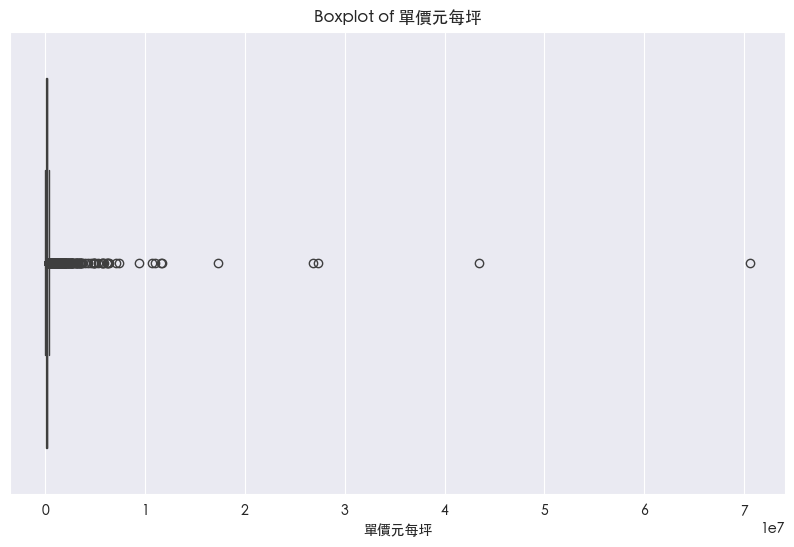

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['單價元每坪'])
plt.title('Boxplot of 單價元每坪')
plt.show()

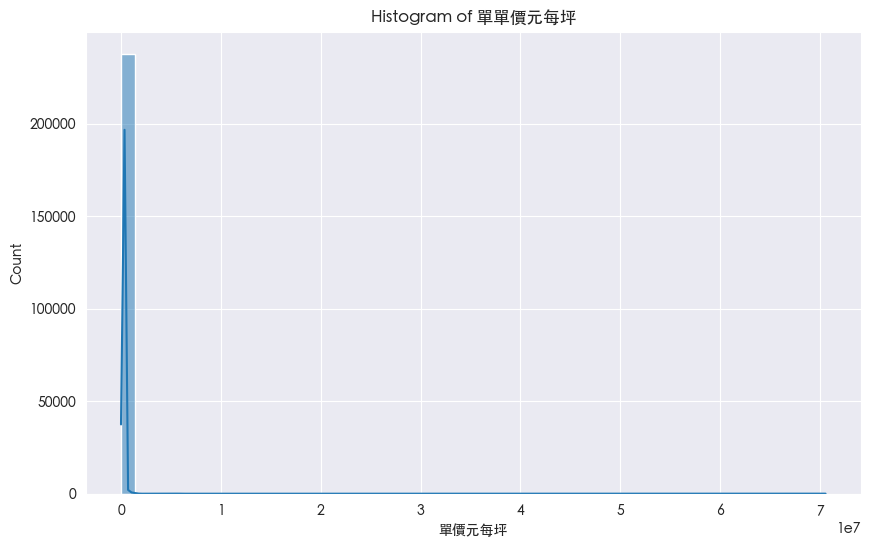

In [9]:

plt.figure(figsize=(10, 6))
sns.histplot(df['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單單價元每坪')
plt.show()

In [10]:
df_cleaned_unitPrice = df.drop(outliers_unitPrice.index)

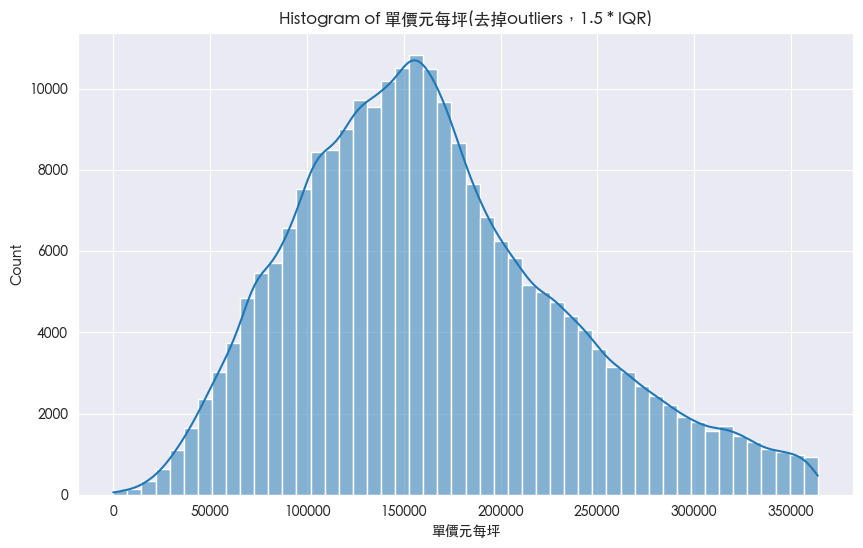

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_unitPrice['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉outliers，1.5 * IQR)')
plt.show()

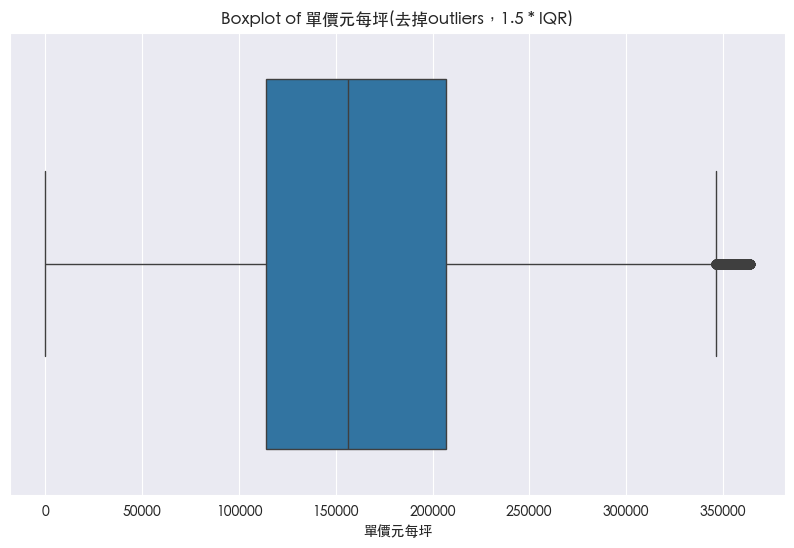

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned_unitPrice['單價元每坪'])
plt.title('Boxplot of 單價元每坪(去掉outliers，1.5 * IQR)')
plt.show()

In [13]:
df_cleaned_unitPrice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229726 entries, 0 to 237831
Data columns (total 51 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         229726 non-null  object 
 1   土地位置建物門牌     229726 non-null  object 
 2   交易年月日        229726 non-null  object 
 3   建築完成年月       209061 non-null  float64
 4   建物移轉總面積平方公尺  229726 non-null  float64
 5   有無管理組織       229726 non-null  object 
 6   總價元          229726 non-null  int64  
 7   單價元平方公尺      229726 non-null  float64
 8   備註           63339 non-null   object 
 9   編號           229726 non-null  object 
 10  緯度           229726 non-null  float64
 11  經度           229726 non-null  float64
 12  bad_count    229726 non-null  float64
 13  good_count   229726 non-null  float64
 14  建築型態清整       229726 non-null  object 
 15  陽台有無         229726 non-null  int64  
 16  是否含額外土地      229726 non-null  int64  
 17  建築型態_住商大樓    229726 non-null  int64  
 18  建築型態_公寓      229726 non-null 

In [15]:
df_cleaned_unitPrice.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_229726row_unitPrice_outlier_iqr.csv',index=False)